NumPy，是Numerical Python的简称，是目前Python数值计算中最为重要的基础包。大多数计算包都提供了基于NumPy的科学函数功能，将NumPy的数组对象作为数据交换的通用语。

以下内容将会出现在NumPy中：

* ndarray，一种高效多维数组，提供了基于数组的便捷算术操作以及灵活的广播功能。
* 对所有数据进行快速的矩阵计算，而无须编写循环程序。
* 对硬盘中数组数据进行读写的工具，并对内存映射文件进行操作。
* 线性代数、随机数生成以及傅里叶变换功能。
* 用于连接NumPy到C、C++和FORTRAN语言类库的C语言API。

由于NumPy提供了一个非常易用的C语言API，这使得，将数据传递给用底层语言编写的外部类库，再由外部类库将计算结果按照NumPy数组的方式返回，变得非常简单。这个特征使得Python可以对存量C/C++/Fortran代码库进行封装，并为这些代码提供动态、易用的接口。

NumPy本身并不提供建模和科学函数，理解NumPy的数组以及基于数组的计算将帮助你更高效地使用基于数组的工具，比如pandas。由于NumPy是一个很大的话题，后续会讲解NumPy的一些高级特性，例如广播机制。

对于大多数的数据分析应用，主要关注的内容为：

* 在数据处理、清洗、构造子集、过滤、变换以及其他计算中进行快速的向量化计算。
* 常见的数组算法，比sort、unique以及set操作等。
* 高效的描述性统计和聚合/概述数据。
* 数据排列和相关数据操作，例如对异构数据进行merge和join。
* 使用数组表达式来表明条件逻辑，代替if-elif-else条件分支的循环。
* 分组数据的操作（聚合、变换以及函数式操作）。

虽然NumPy提供了数值数据操作的计算基础，但大多数人还是想把pandas作为统计、分析的基石，尤其是针对表格数据。pandas提供了更多的针对特定场景的函数功能，例如时间序列操作等NumPy并不包含的功能。

Python中的数组计算方式要追溯到1995年，当时Jim Hugunin创造Numeric库。之后10年里，许多科研编程社区开始利用Python进行数组编程，但类库的生态在2000年之后都是碎片化的。2005年，Travis Oliphant在Numeric和Numarray项目之上打造了NumPy，将社区整合到同一个数组计算框架下。

NumPy之所以如此重要，其中一个原因就是它的设计对于含有大量数组的数据非常有效。此外还有如下原因：

* NumPy在内部将数据存储在连续的内存块上，这与其他的Python内建数据结构是不同的。NumPy的算法库是用C语言写的，所以在操作数据内存时，不需要任何类型检查或者其他管理操作。NumPy数组使用的内存量也小于其他Python内建序列。
* NumPy可以针对全量数组进行复杂计算而不需要写Python循环。

下面的例子将展现NumPy的不同，假设一个NumPy数组包含100万个整数，还有一个同样数据内容的Python列表，现在同时对每个序列乘以2：

In [1]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [2]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 37.1 ms, sys: 28.4 ms, total: 65.5 ms
Wall time: 62 ms


In [3]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 980 ms, sys: 276 ms, total: 1.26 s
Wall time: 1.24 s


NumPy的方法比Python方法要快10到100倍，并且使用的内存也更少。

## 4.1　NumPy ndarray：多维数组对象
NumPy的核心特征之一就是N-维数组对象——ndarray。ndarray是Python中一个快速、灵活的大型数据集容器。数组允许你使用类似于标量的操作语法在整块数据上进行数学计算。

为了让你感受下NumPy如何使用类似于Python内建对象的标量计算语法进行批量计算，我首先导入NumPy，再生成一个小的随机数组：

In [4]:
import numpy as np

# 生成随机数组
data = np.random.randn(2, 3)
print(data)

# 给data加上一个数学操作：
print(data * 10)
print(data * data)

[[-1.66378331  0.35332454 -0.20878118]
 [ 1.00556167  1.42869563  0.56133272]]
[[-16.63783305   3.53324544  -2.08781181]
 [ 10.05561673  14.28695633   5.61332719]]
[[2.76817489 0.12483823 0.04358958]
 [1.01115428 2.04117121 0.31509442]]


在第一个数学操作中，所有的元素都同时乘以了10。在第二个数学操作中，数组中的对应元素进行了相加。

都使用标准的NumPy导入方式`import numpy as np`。当然也可以在代码中写`from numpy import *`来省略多写的一个np。然而还是建议保持写标准导入的方式。numpy这个命名空间包含了大量与Python内建函数重名的函数（比如min和max）。

一个ndarray是一个通用的多维同类数据容器，也就是说，它包含的每一个元素均为相同类型。每一个数组都有一个shape属性，用来表征数组每一维度的数量；每一个数组都有一个dtype属性，用来描述数组的数据类型：

In [5]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


介绍NumPy数组的基础操作，这部分内容将足以保证后面内容的阅读。虽然深入理解NumPy对于大部分数据分析应用并不是必需的，但是精通基于数组的编程和思考是成为Python科学计算专家的重要一步。

> 约定当看到“数组”、“NumPy数组”或“ndarray”时，他们都表示同一个对象：ndarray对象。

### 4.1.1　　生成ndarray
生成数组最简单的方式就是使用array函数。array函数接收任意的序列型对象（当然也包括其他的数组），生成一个新的包含传递数据的NumPy数组。

In [6]:
data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(range(10))
print(arr1, type(arr1))

arr1 = np.array(data1)
print(arr1, type(arr1))

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'>
[6.  7.5 8.  0.  1. ] <class 'numpy.ndarray'>


嵌套序列，例如同等长度的列表，将会自动转换成多维数组：

In [7]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2, type(arr2))

[[1 2 3 4]
 [5 6 7 8]] <class 'numpy.ndarray'>


因为data2是一个包含列表的列表，所以Numpy数组arr2形成了二维数组。我们可以通过检查ndim和shape属性来确认这一点：

In [8]:
# 数组维数(Number of array dimensions)
print(arr2.ndim)

# 数组形状(Tuple of array dimensions.)
print(arr2.shape)

2
(2, 4)


除非显式地指定，否则np.array会自动推断生成数组的数据类型。数据类型被存储在一个特殊的元数据dtype中。例如，之前的两个例子：

In [9]:
print(arr1.dtype)

print(arr2.dtype)

float64
int64


除了np.array，还有很多其他函数可以创建新数组。例如，给定长度及形状后，zeros可以一次性创造全0数组，ones可以一次性创造全1数组。empty则可以创建一个没有初始化数值的数组。想要创建高维数组，则需要为shape传递一个元组：

In [10]:
np_test = np.zeros(10)
print(np_test, type(np_test))

np_test = np.zeros((3, 6))
print(np_test, type(np_test))

np_test = np.empty((2, 3, 2))
print(np_test, type(np_test))

np_test

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] <class 'numpy.ndarray'>
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] <class 'numpy.ndarray'>
[[[1.82903734e-316 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]]

 [[0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]]] <class 'numpy.ndarray'>


array([[[1.82903734e-316, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

> 要使用np.empty来生成一个全0数组，并不安全，有些时候它可能会返回未初始化的垃圾数值。

arange是Python内建函数range的数组版：

In [11]:
np_test = np.arange(15)
print(np_test, type(np_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] <class 'numpy.ndarray'>


下表展示的是标准数组的生成函数。由于NumPy专注于数值计算，如果没有特别指明的话，默认的数据类型是float64（浮点型）。


| 函数             | 描述                                                                                                 |
| -               | -                                                                                                    |
| array           | 将输入数据(可以是列表、元组、数组以及其他序列)转换为ndarray,如不显式指明数据类型,将自动推断;默认复制所有的输入数据 |
| asarray         | 将输入转换为 ndarray,但如果输入已经是 ndarray则不再复制                                                   |
| arange          | Python内建函数 range的数组版,返回一个数组                                                               |
| ones            | 根据给定形状和数据类型生成全1数组                                                                        |
| ones_like       | 根据所给的数组生成一个形状一样的全1数组                                                                   |
| zeros           | 根据给定形状和数据类型生成全0数组                                                                        |
| zeros_like      | 根据所给的数组生成一个形状一样的全0数组                                                                   |
| empty           | 根据给定形状生成一个没有初始化数值的空数组                                                                 |
| empty_like      | 根据所给数组生成一个形状一样但没有初始化数值的空数组                                                        |
| full            | 根据给定的形状和数据类型生成指定数值的数组                                                                 |
| full_like       | 根据所给的数组生成一个形状一样但内容是指定数值的数组                                                        |
| eyes, indentity | 生成一个N*N特征矩阵(对角线位置都是1,其余位置是0)                                                          |


### 4.1.2　ndarray的数据类型
数据类型，即dytpe，是一个特殊的对象，它包含了ndarray需要为某一种类型数据所申明的内存块信息（也称为元数据，即表示数据的数据）：

In [12]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

print(arr1.dtype, type(arr1.dtype))
print(arr2.dtype, type(arr2.dtype))

float64 <class 'numpy.dtype'>
int32 <class 'numpy.dtype'>


dtype是NumPy能够与其他系统数据灵活交互的原因。通常，其他系统提供一个硬盘或内存与数据的对应关系，使得利用C或Fortran等底层语言读写数据变得十分方便。数据的dtype通常都是按照一个方式命名：类型名，比如float和int，后面再接上表明每个元素位数的数字。一个标准的双精度浮点值（Python中数据类型为float），将使用8字节或64位。因此，这个类型在NumPy中称为float64。下表展现所有的NumPy所支持的数据类型。

| 类型           | 类型代码      | 描述                                          |
| ------------- | ------------ | -------------------------------------------- |
| int8, uint8   | i1, u1       | 有符号和无符号的8位整数                          |
| int16, uint16 | i2, u2       | 有符号和无符号的16位整数                         |
| int32, uint32 | i4, u4       | 有符号和无符号的32位整数                         |
| int64, uint64 | i8, u8       | 有符号和无符号的64位整数                         |
| float16       | f2           | 半精度浮点数                                   |
| float32       | f4或f         | 标准单精度浮点数； 兼容C语言float                |
| float64       | f8或d         | 标准双精度浮点数； 兼容C语言double和Python float |
| float128      | f16或g        | 拓展精度浮点数                                 |
| complex64,    | c8, c16, c32 | 分别基于32位、64位、128位浮点数的复数             |
| complex128    |              |                                              |
| complex256    |              |                                              |
| bool          | ?            | 布尔值，存储True或False                        |
| obiect        | O            | Python object类型                             |
| string        | S            | 修正的ASCII字符串类型；（长度为10，使用'S10'）    |
| unicode       | U            | 修正的Unicode字符串类型；（长度为10，使用'U10'）  |

通常你只需要关心数据的大类，比如是否是浮点型、整数、布尔值、字符串或某个Python对象。当需要在内存或硬盘上做更深入的存取操作时，尤其是大数据集时，才真正需要了解存储的数据类型。

可以使用astype方法显式地转换数组的数据类型：

In [13]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int64
float64


如果把浮点数转换成整数，则小数点后的部分将被去除：

In [14]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
print(arr.astype(np.int32))

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]
[ 3 -1 -2  0 12 10]


一个数组，里面的元素都是表达数字含义的字符串，也可以通过astype将字符串转换为数字：

In [15]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

print(numeric_strings, numeric_strings.dtype)
print(numeric_strings.astype(float), numeric_strings.astype(float).dtype)

[b'1.25' b'-9.6' b'42'] |S4
[ 1.25 -9.6  42.  ] float64


> 在NumPy中，当使用`numpy.string_`类型作字符串数据要小心，因为NumPy会修正它的大小或删除输入且不发出警告。pandas在处理非数值数据时有更直观的开箱型操作。

如果因为某些原因导致转换类型失败（比如字符串无法转换为float64位时），将会抛出一个ValueError。
> 这里使用float来代替np.float64，是因为NumPy可以使用相同别名来表征与Python精度相同的Python数据类型。

也可以使用另一个数组的dtype属性，来传递属性：

In [16]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
print(int_array.astype(calibers.dtype))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


也可以使用类型代码来传入数据类型：

In [17]:
print(np.empty(8))
empty_uint32 = np.empty(8, dtype='u4')
print(empty_uint32)

[4.9e-324 9.9e-324 1.5e-323 2.0e-323 2.5e-323 3.0e-323 3.5e-323 4.0e-323]
[         0 1075314688          0 1075707904          0 1075838976
          0 1072693248]


> 使用astype时总是生成一个新的数组，即使传入的dtype与之前一样。

### 4.1.3　NumPy数组算术
数组之所以重要是因为它允许你进行批量操作而无须任何for循环。NumPy用户称这种特性为向量化。任何在两个等尺寸数组之间的算术操作都应用了逐元素操作的方式：

In [18]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr * arr)
print(arr - arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


带有标量计算的算术操作，会把计算参数传递给数组的每一个元素：

In [19]:
print(1 / arr)
print(arr ** 0.5)

[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]


同尺寸数组之间的比较，会产生一个布尔值数组：

In [20]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr2)
print(arr2 > arr)

[[ 0.  4.  1.]
 [ 7.  2. 12.]]
[[False  True False]
 [ True False  True]]


不同尺寸的数组间的操作，将会用到广播特性。

### 4.1.4　基础索引与切片
NumPy数组索引是一个大话题，有很多种方式可以选中数据的子集或某个单个元素。一维数组比较简单，看起来和Python的列表很类似：

In [21]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


如果传入了一个数值给数组的切片，例如`arr[5：8]=12`，数值被传递给了整个切片。区别于Python的内建列表，数组的切片是原数组的视图。这意味着数据并不是被复制了，任何对于视图的修改都会反映到原数组上。

In [22]:
arr_slice = arr[5:8]

print(arr_slice)

[12 12 12]


当改变arr_slice，变化也会体现在原数组上：

In [23]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

不写切片值的[：]将会引用数组的所有值：

In [24]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

其他的数组编程语言都是更为急切地复制数据。由于NumPy被设计成适合处理非常大的数组，可以想象如果NumPy持续复制数据会引起多少内存问题。

> 如果还是想要一份数组切片的拷贝而不是一份视图的话，就必须显式地复制这个数组，例如`arr[5：8].copy（）`

对更高维度的数组，会有更多选择。在一个二维数组中，每个索引值对应的元素不再是一个值，而是一个一维数组：

In [25]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

因此，单个元素可以通过递归的方式获得。但是要多写点代码，你可以通过传递一个索引的逗号分隔列表去选择单个元素，以下两种方式效果一样：

In [26]:
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


在多维数组中，可以省略后续索引值，返回的对象将是降低一个维度的数组。因此在一个2×2×3的数组arr3d中：

In [27]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

print(arr3d)
print(arr3d.shape)
# arr3d[0]是一个2×3的数组：
print(arr3d[0])
print(arr3d[0].shape)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)
[[1 2 3]
 [4 5 6]]
(2, 3)


标量和数组都可以传递给arr3d[0]：

In [28]:
old_values = arr3d[0].copy()
arr3d[0] = 42
print(arr3d)
print("----------")
arr3d[0] = old_values
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
----------
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


类似地，arr3d[1，0]返回的是一个一维数组：

In [29]:
arr3d[1, 0]

array([7, 8, 9])

上面的表达式可以分解为下面两步：

In [30]:
x = arr3d[1]
print(x)
print(x[0])

[[ 7  8  9]
 [10 11 12]]
[7 8 9]


需要注意的是，以上的数组子集选择中，返回的数组都是`视图`。

#### 4.1.4.1　数组的切片索引

与Python列表的一维对象类似，数组可以通过类似的语法进行切片：

In [31]:
print(arr)
print(arr[1:6])

[ 0  1  2  3  4 64 64 64  8  9]
[ 1  2  3  4 64]


再回想下前面的二维数组，arr2d，对数组进行切片略有不同：

In [32]:
print(arr2d)

print(arr2d[:2])
print(arr2d[:2, :2])
print(arr2d[:, :2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]
[[1 2]
 [4 5]]
[[1 2]
 [4 5]
 [7 8]]


数组沿着轴0进行了切片。表达式`arrzd[：2]`的含义为选择arr2d的前两“行”。

可以进行多组切片，与多组索引类似：

In [33]:
print(arr2d[:2, 1:])

[[2 3]
 [5 6]]


在上面这个例子中那样切片时，需要按照原数组的维度进行切片。如果将索引和切片混合，就可以得到低维度的切片。

例如，可以选择第二行但是只选择前两列：

In [34]:
arr2d[1, :2]

array([4, 5])

类似地，也可以选择第三列，但是只选择前两行：

In [35]:
print(arr2d)
# 注意这两种不同切片方式的结果
# 切出来的是一维的数组
print(arr2d[:2, 2], arr2d[:2, 2].shape)
# 切出来的是矩阵（向量）
print(arr2d[:2, 2:3], arr2d[:2, 2:3].shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[3 6] (2,)
[[3]
 [6]] (2, 1)


需要注意的是，单独一个冒号表示选择整个轴上的数组，可以按照下面的方式在更高维度上进行切片：

In [36]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

对切片表达式赋值时，整个切片都会重新赋值：

In [37]:
arr2d[:2, 1:] = 0
print(arr2d)

[[1 0 0]
 [4 0 0]
 [7 8 9]]


### 4.1.5　布尔索引
假设数据都在数组中，并且数组中的数据是一些存在重复的人名。可以使用numpy.random中的randn函数来生成一些随机正态分布的数据：

In [38]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [39]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [40]:
data

array([[-0.2780747 ,  1.85471521,  0.59282245, -1.47050481],
       [ 0.51013794,  0.82825926,  1.14706472,  1.25702978],
       [ 0.29163795, -1.53326307,  1.29497748,  0.73627944],
       [-0.02425234, -0.51063244,  0.53950334, -0.02491018],
       [ 1.36856233, -1.88461655, -0.95989986, -0.54895186],
       [ 0.52609978, -0.82194034,  2.02478468, -1.2957634 ],
       [-0.16122789,  0.88606254,  0.03222369, -0.40726919]])

假设每个人名都和data数组中的一行相对应，并且想要选中所有'Bob'对应的行。与数学操作类似，数组的比较操作（比如==）也是可以向量化的。因此，比较names数组和字符串'Bob'会产生一个布尔值数组：

In [41]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

在索引数组时可以传入布尔值数组：

In [42]:
data[names == 'Bob']

array([[-0.2780747 ,  1.85471521,  0.59282245, -1.47050481],
       [-0.02425234, -0.51063244,  0.53950334, -0.02491018]])

布尔值数组的长度必须和数组轴索引长度一致。甚至还可以用切片或整数值（或整数值的序列）对布尔值数组进行混合和匹配。

> 当布尔值数组的长度不正确时，布尔值选择数据的方法并不会报错，因此建议在使用该特性的时候要小心。

In [43]:
data[names == 'Bob', 3:4]

array([[-1.47050481],
       [-0.02491018]])

In [44]:
data[names == 'Bob', 3]

array([-1.47050481, -0.02491018])

为了选择除了'Bob'以外的其他数据，可以使用`!=`或在条件表达式前使用`~`对条件取反：

In [45]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [46]:
data[~(names == 'Bob')]

array([[ 0.51013794,  0.82825926,  1.14706472,  1.25702978],
       [ 0.29163795, -1.53326307,  1.29497748,  0.73627944],
       [ 1.36856233, -1.88461655, -0.95989986, -0.54895186],
       [ 0.52609978, -0.82194034,  2.02478468, -1.2957634 ],
       [-0.16122789,  0.88606254,  0.03222369, -0.40726919]])

`~`符号可以在你想要对一个通用条件进行取反时使用：

In [47]:
cond = names == 'Bob'
data[~cond]

array([[ 0.51013794,  0.82825926,  1.14706472,  1.25702978],
       [ 0.29163795, -1.53326307,  1.29497748,  0.73627944],
       [ 1.36856233, -1.88461655, -0.95989986, -0.54895186],
       [ 0.52609978, -0.82194034,  2.02478468, -1.2957634 ],
       [-0.16122789,  0.88606254,  0.03222369, -0.40726919]])

当要选择三个名字中的两个时，可以对多个布尔值条件进行联合，需要使用数学操作符如`&`（and）和`|`（or）：

In [48]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [49]:
data[mask]

array([[-0.2780747 ,  1.85471521,  0.59282245, -1.47050481],
       [ 0.29163795, -1.53326307,  1.29497748,  0.73627944],
       [-0.02425234, -0.51063244,  0.53950334, -0.02491018],
       [ 1.36856233, -1.88461655, -0.95989986, -0.54895186]])

> 使用布尔值索引选择数据时，总是生成数据的拷贝，即使返回的数组并没有任何变化。

> Python的关键字and和or对布尔值数组并没有用，请使用`&`（and）和`|`（or）来代替。

基于常识来设置布尔值数组的值也是可行的。将data中所有的负值设置为0，可以如此操作：

In [50]:
data[data < 0] = 0
data

array([[0.        , 1.85471521, 0.59282245, 0.        ],
       [0.51013794, 0.82825926, 1.14706472, 1.25702978],
       [0.29163795, 0.        , 1.29497748, 0.73627944],
       [0.        , 0.        , 0.53950334, 0.        ],
       [1.36856233, 0.        , 0.        , 0.        ],
       [0.52609978, 0.        , 2.02478468, 0.        ],
       [0.        , 0.88606254, 0.03222369, 0.        ]])

利用一维布尔值数组对每一行设置数值也是非常简单的：

In [51]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.51013794, 0.82825926, 1.14706472, 1.25702978],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.52609978, 0.        , 2.02478468, 0.        ],
       [0.        , 0.88606254, 0.03222369, 0.        ]])

后续将会看到，如何利用pandas方便地在二维数据上进行上述的操作。

### 4.1.6　神奇索引
神奇索引是NumPy中的术语，用于描述使用整数数组进行数据索引。

In [52]:
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i   
print(arr)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


为了选出一个符合特定顺序的子集，可以简单地通过传递一个包含指明所需顺序的列表或数组来完成：

In [53]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

如果使用负的索引，将从尾部进行选择：

In [54]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

传递多个索引数组时情况有些许不同，这样会根据每个索引元组对应的元素选出一个一维数组：

In [55]:
print(np.arange(32))
arr = np.arange(32).reshape((8, 4))
arr

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [56]:
# 取(1,0),(5,3),(7,1),(2,2)并构造数组
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

在上述例子中，元素（1，0）、（5，3）、（7，1）和（2，2）被选中。

> 如果不考虑数组的维数（本例中是二维），神奇索引的结果总是一维的。

通常情况下，如果是通过选择矩阵中行列的子集所形成的矩形区域。下面是实现的一种方式：

In [57]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

> 请牢记神奇索引与切片不同，它总是将数据复制到一个新的数组中。

### 4.1.7　数组转置和换轴
转置是一种特殊的数据重组形式，可以返回底层数据的视图而不需要复制任何内容。数组拥有transpose方法，也有特殊的T属性：

In [58]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


当进行矩阵计算时，可能会经常进行一些特定操作，比如，当计算矩阵内积会使用`np.dot`：

In [59]:
arr = np.random.randn(6, 3)

print(arr)
print("-"*50)
print(np.dot(arr.T, arr))       

[[ 0.22340128  2.70914476  0.79085653]
 [ 0.32665669  0.219522   -0.36015957]
 [-0.20274634 -2.18238955  0.20442503]
 [ 0.08538851  1.05808451 -0.19519054]
 [-1.13146012 -0.34238701 -1.09660094]
 [-0.90950433  0.9212849  -1.35500909]]
--------------------------------------------------
[[ 2.31241014  0.75923913  2.47406325]
 [ 0.75923913 14.23601697  0.53793124]
 [ 2.47406325  0.53793124  3.87364117]]


对于更高维度的数组，`transpose`方法可以接收包含轴编号的元组，用于置换轴（拓展下思维）：

In [60]:
arr = np.arange(16).reshape((2, 2, 2, 2))

print(arr)
print("-"*50)
print(arr.transpose((1, 2, 0, 3)))

[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]
--------------------------------------------------
[[[[ 0  1]
   [ 8  9]]

  [[ 2  3]
   [10 11]]]


 [[[ 4  5]
   [12 13]]

  [[ 6  7]
   [14 15]]]]


在这里，轴已经被重新排序，使得原先的第二个轴变为第一个，原先的第一个轴变成了第二个，最后一个轴并没有改变。

使用.T进行转置是换轴的一个特殊案例。ndarray有一个swapaxes方法，该方法接收一对轴编号作为参数，并对轴进行调整用于重组数据：

In [61]:
print(arr.swapaxes(1, 2))
print("-"*50)
print(arr)

[[[[ 0  1]
   [ 4  5]]

  [[ 2  3]
   [ 6  7]]]


 [[[ 8  9]
   [12 13]]

  [[10 11]
   [14 15]]]]
--------------------------------------------------
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]


> swapaxes返回的是数据的视图，而没有对数据进行复制。

## 4.2　通用函数：快速的逐元素数组函数
通用函数，也可以称为ufunc，是一种在ndarray数据中进行逐元素操作的函数。某些简单函数接收一个或多个标量数值，并产生一个或多个标量结果，而通用函数就是对这些简单函数的向量化封装。

有很多ufunc是简单的逐元素转换，比如sqrt或exp函数：

In [62]:
arr = np.arange(10)
print(arr)

print(np.sqrt(arr))
print(np.exp(arr))        

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


这些是所谓的一元通用函数。还有一些通用函数，比如add或maximum则会接收两个数组并返回一个数组作为结果，因此称为二元通用函数：

In [63]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x,y)
print(np.maximum(x, y))

[ 1.20862074  1.17972033 -0.22804582 -1.26331814 -0.1258529  -0.96264587
 -0.58224708 -0.75352136] [ 0.04167336  0.3572661   2.05690236 -0.89785692 -1.74797039  1.74658481
 -0.51553371 -0.5465496 ]
[ 1.20862074  1.17972033  2.05690236 -0.89785692 -0.1258529   1.74658481
 -0.51553371 -0.5465496 ]


这里，numpy.maximum逐个元素地将x和y中元素的最大值计算出来。

也有一些通用函数返回多个数组。比如modf，是Python内建函数divmod的向量化版本。它返回了一个浮点值数组的小数部分和整数部分：

In [64]:
arr = np.random.randn(7) * 5

print(arr)

# 返回一个浮点值数组的小数部分和整数部分
remainder, whole_part = np.modf(arr)

print(remainder)
print(whole_part)

[ 4.7377329   5.74718254  2.51348656 -6.78022251 -8.81414623 11.21991382
  8.07105903]
[ 0.7377329   0.74718254  0.51348656 -0.78022251 -0.81414623  0.21991382
  0.07105903]
[ 4.  5.  2. -6. -8. 11.  8.]


通用函数接收一个可选参数out，允许对数组按位置操作：

In [65]:
print(arr)
print("-"*50)
print(np.sqrt(arr))
print("-"*50)
print(np.sqrt(arr, arr))
print("-"*50)
print(arr)

[ 4.7377329   5.74718254  2.51348656 -6.78022251 -8.81414623 11.21991382
  8.07105903]
--------------------------------------------------
[2.17663339 2.39732821 1.58539792        nan        nan 3.34961398
 2.84096093]
--------------------------------------------------
[2.17663339 2.39732821 1.58539792        nan        nan 3.34961398
 2.84096093]
--------------------------------------------------
[2.17663339 2.39732821 1.58539792        nan        nan 3.34961398
 2.84096093]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


## 4.3　使用数组进行面向数组编程
使用NumPy数组可以利用简单的数组表达式完成多种数据操作任务，而无须写些大量循环。这种利用数组表达式来替代显式循环的方法，称为`向量化`。通常，向量化的数组操作会比纯Python的等价实现在速度上快一到两个数量级（甚至更多），这对所有种类的数值计算产生了最大的影响。

作为一个简单的示例，假设想要对一些网格数据来计算函数sqrt（x^2+y^2）的值。np.meshgrid函数接收两个一维数组，并根据两个数组的所有（x，y）对生成一个二维矩阵：

In [66]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

xs, ys = np.meshgrid(points, points)
#print(points)
print("-"*50)
print(xs)
print("-"*50)
print(ys)

--------------------------------------------------
[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
--------------------------------------------------
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


现在，你可以用和两个坐标值同样的表达式来使用函数：

In [67]:
z = np.sqrt(xs ** 2 + ys ** 2)
print(z)

[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


使用matplotlib来生成这个二维数组的可视化：

In [68]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

使用matplotlib函数imshow根据函数值的二维数组生成一个图像。

### 4.3.1　将条件逻辑作为数组操作
numpy.where函数是三元表达式x if condition else y的向量化版本。假设我们有一个布尔值数组和两个数值数组：

In [69]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

假设cond中的元素为True时，取xarr中的对应元素值，否则取yarr中的元素。可以通过列表推导式来完成，像下列代码这样：

In [70]:
# %%timeit
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

> 这样会产生多个问题。首先，如果数组很大的话，速度会很慢（因为所有的工作都是通过解释器解释Python代码完成）。其次，当数组是多维时，就无法凑效了。

而使用np.where时，就可以非常简单地完成：

In [71]:
# %%timeit
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数并不需要是数组，它们可以是标量。where在数据分析中的一个典型用法是根据一个数组来生成一个新的数组。假设你有一个随机生成的矩阵数据，并且你想将其中的正值都替换为2，将所有的负值替换为-2，使用np.where会很容易实现：

In [72]:
arr = np.random.randn(4, 4)

print(arr)
print(arr > 0)
print(np.where(arr > 0, 1, -1))

[[-0.27851414  1.2811958   2.79646934  0.56978287]
 [-1.10294534  0.24606657 -2.25810832  0.39194609]
 [-0.06439795  0.62290223  0.11677971 -0.90953791]
 [-0.48698015  0.78021673 -0.0877678   1.66511349]]
[[False  True  True  True]
 [False  True False  True]
 [False  True  True False]
 [False  True False  True]]
[[-1  1  1  1]
 [-1  1 -1  1]
 [-1  1  1 -1]
 [-1  1 -1  1]]


可以使用np.where将标量和数组联合，例如，可以像下面的代码那样将arr中的所有正值替换为常数2：

In [73]:
# 可以传入同结构的数组
print(np.where(arr > 0, 2, arr)) # 仅将正值设为2
print("-"*50)
arr_test = np.random.randn(4, 4)
print(np.where(arr > 0, 2, arr_test)) # 将正值进行用另一个矩阵进行替换

[[-0.27851414  2.          2.          2.        ]
 [-1.10294534  2.         -2.25810832  2.        ]
 [-0.06439795  2.          2.         -0.90953791]
 [-0.48698015  2.         -0.0877678   2.        ]]
--------------------------------------------------
[[ 1.13958588  2.          2.          2.        ]
 [ 0.8094936   2.         -0.61745729  2.        ]
 [-0.56599179  2.          2.         -0.49095711]
 [-0.48118639  2.          0.23683375  2.        ]]


> 传递给np.where的数组既可以是同等大小的数组，也可以是标量。

### 4.3.2　数学和统计方法
许多关于计算整个数组统计值或关于轴向数据的数学函数，可以作为数组类型的方法被调用。可以使用`聚合函数`（通常也叫缩减函数），比如sum、mean(平均值)和std（标准差），既可以直接调用数组实例的方法，也可以使用顶层的NumPy函数。

In [74]:
arr = np.random.randn(5, 4)

print(arr)
print(arr.mean())
print(np.mean(arr))
print(arr.sum())
print(arr[:4,:1].mean())

[[ 1.22357829 -2.03476097  0.58127121  0.48602189]
 [ 0.12651873  0.50103392  1.41272308  1.43558231]
 [-0.03291312  0.5304855   0.23574908 -0.28691473]
 [ 0.12683735  0.26121565 -0.47177478  1.12037175]
 [ 0.71037734  0.51376164 -1.15352683 -1.4552571 ]]
0.1915190109234683
0.1915190109234683
3.830380218469366
0.36100531271603487


像mean、sum等函数可以接收一个可选参数axis，这个参数可以用于计算给定轴向上的统计值，形成一个下降一维度的数组：

In [75]:
# 按列计算
print(arr.mean(axis=1))

# 按行计算
print(arr.sum(axis=0))
print(np.sum(arr, axis=0))

[ 0.06402761  0.86896451  0.11160168  0.25916249 -0.34616124]
[ 2.15439859 -0.22826425  0.60444177  1.29980411]
[ 2.15439859 -0.22826425  0.60444177  1.29980411]


arr.mean(1)表示“计算每一列的平均值”，而arr.sum(0)表示“计算行轴向的累和”。

其他的方法，例如cumsum和cumprod并不会聚合，它们会产生一个中间结果：

In [76]:
arr = np.arange(8)
print(arr)
arr.cumsum()

[0 1 2 3 4 5 6 7]


array([ 0,  1,  3,  6, 10, 15, 21, 28])

在多维数组中，像cumsum这样的累积函数返回相同长度的数组，但是可以在指定轴向上根据较低维度的切片进行部分聚合：

In [77]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

print(arr)
print(arr.cumsum(axis=0))
print(arr.cumprod(axis=1))
print(arr.cumsum())

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]
[ 0  1  3  6 10 15 21 28 36]


### 4.3.3　布尔值数组的方法
在前面介绍的方法，布尔值会被强制为1（True）和0（False）。因此，sum通常可以用于计算布尔值数组中的True的个数：

In [78]:
arr = np.random.randn(100)

(arr > 0).sum() # 正值的个数

53

对于布尔值数组，有两个非常有用的方法any和all。any检查数组中是否至少有一个True，而all检查是否每个值都是True：

In [79]:
bools = np.array([False, False, True, False])

print(bools.any())
print(bools.all())

True
False


这些方法也可适用于非布尔值数组，所有的非0元素都会按True处理。

### 4.3.4　排序
和Python的内建列表类型相似，NumPy数组可以使用sort方法按位置排序：

In [80]:
arr = np.random.randn(6)

print(arr)
# 和list.sort()一样，会改变原来对象的值
arr.sort()
print(arr)

[-1.25781708 -0.23764481  0.47105431  0.06763119  1.79256605  0.81756052]
[-1.25781708 -0.23764481  0.06763119  0.47105431  0.81756052  1.79256605]


可以在多维数组中根据传递的axis值，沿着轴向对每个一维数据段进行排序：

In [81]:
arr = np.random.randn(5, 3)

print(arr)
# 按行排序
arr.sort(axis=1)
print("-"*50)
print(arr)
# 按列排序
arr.sort(axis=0)
print("-"*50)
print(arr)

[[ 1.2680527  -0.5319483  -0.30126113]
 [ 0.3973903   0.44370868 -0.45395025]
 [-1.33488091  0.70443869 -0.60376889]
 [-0.96188673 -0.93892209  0.7532754 ]
 [-1.54490897 -0.2690804  -0.3340371 ]]
--------------------------------------------------
[[-0.5319483  -0.30126113  1.2680527 ]
 [-0.45395025  0.3973903   0.44370868]
 [-1.33488091 -0.60376889  0.70443869]
 [-0.96188673 -0.93892209  0.7532754 ]
 [-1.54490897 -0.3340371  -0.2690804 ]]
--------------------------------------------------
[[-1.54490897 -0.93892209 -0.2690804 ]
 [-1.33488091 -0.60376889  0.44370868]
 [-0.96188673 -0.3340371   0.70443869]
 [-0.5319483  -0.30126113  0.7532754 ]
 [-0.45395025  0.3973903   1.2680527 ]]


> 顶层的np.sort方法返回的是已经排序好的数组拷贝，而不是对原数组按位置排序。下面的例子计算的是一个数组的分位数，并选出分位数所对应的值，这是一种应急的方式：

In [82]:
large_arr = np.random.randn(10000)

large_arr.sort()

large_arr[int(0.05 * len(large_arr))] # 5% quantile(5%的分位数)

-1.6494512631927636

一些与排序相关的其他种类的数据操作（比如根据一张表中的某一列进行排序），也将会出现在pandas中。

### 4.3.5　唯一值与其他集合逻辑
NumPy包含一些针对一维ndarray的基础集合操作。常用的一个方法是np.unique，返回的是数组中唯一值`排序后`形成的数组：

In [83]:
names =np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [84]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

np.unique(ints)

array([1, 2, 3, 4])

将np.unique和纯Python实现相比较：

In [85]:
sorted(set(names))

['Bob', 'Joe', 'Will']

另一个函数，`np.in1d`，可以检查一个数组中的值是否在另外一个数组中，并返回一个布尔值数组：

In [86]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

下表是NumPy中集合函数的列表。

| 方法             | 描述                                     |
| ---------------- | --------------------------------------- |
| unique(x)        | 计算x的唯一值,并排序                      |
| intersect1d(x,y) | 计算x和y的交集,并排序                     |
| union1d(x,y)     | 计算x和y的并集,并排序                     |
| in1d(x,y)        | 计算中的元素是否包含在y中,返回一个布尔值数组 |
| setdiff1d(x,y)   | 差集,在x中但不在y中的x的元素               |
| setxor1d(x,y)    | 异或集,在x或y中,但不属于x、y交集的元素      |

## 4.4　使用数组进行文件输入和输出
NumPy可以在硬盘中将数据以文本或二进制文件的形式进行存入硬盘或由硬盘载入。在本节，只讨论NumPy的内建二进制格式，因为大部分用户更倾向于使用pandas或其他工具来载入文本或表格型数据。

`np.save`和`np.load`是高效存取硬盘数据的两大工具函数。数组在默认情况下是以未压缩的格式进行存储的，后缀名是`.npy`：

In [87]:
arr = np.arange(10)

np.save('some_array', arr)

> 如果文件存放路径中没写.npy时，后缀名会被自动加上。硬盘上的数组可以使用np.load进行载入：

In [88]:
load_arr = np.load('some_array.npy')
load_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

可以使用`np.savez`并将数组作为参数传递给该函数，用于在未压缩文件中保存多个数组：

In [89]:
np.savez('array_archive.npz', a=arr, b=np.random.randn(5,5))

当载入一个.npy文件的时候，会获得一个字典型的对象，并通过该对象很方便地载入单个数组：

In [90]:
arch = np.load('array_archive.npz')

arch['b'], arch['a']

(array([[ 1.31369748, -0.18122569,  0.46102375, -0.60789025, -0.36740244],
        [-1.18598753,  0.39016994, -0.56301308,  1.13187503, -0.38391976],
        [-1.05611536, -2.31151427,  0.52314813, -0.80153611,  2.06001215],
        [ 1.2409101 ,  0.67223961,  0.23379065,  0.36256208,  0.31625483],
        [-1.42253345,  0.27978663,  1.22259628, -0.45386881, -0.88801012]]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

如果的数据已经压缩好了，可能会想要使用`numpy.savez_compressed`将数据存入已经压缩的文件：

In [91]:
np.savez_compressed('arrays_compressed.npz', a=arr, c=np.random.randn(5,5))

np.load('arrays_compressed.npz')['c']

array([[ 2.146713  , -1.43821659,  0.73303467, -0.14037148, -0.11560512],
       [ 0.92319032,  1.25790864,  0.75737734, -1.02636212,  1.40279775],
       [-0.36898347,  0.87677296, -0.55569642,  1.25249954,  0.66204371],
       [-1.92556443,  0.82513129,  0.57328021,  0.47081025, -1.44693118],
       [ 0.13834343,  1.89502454,  1.08921713, -0.16344893,  1.15539763]])

## 4.5　线性代数
线性代数，比如矩阵乘法、分解、行列式等方阵数学，是所有数组类库的重要组成部分。和Matlab等其他语言相比，NumPy的线性代数中所不同的是`*`是矩阵的逐元素乘积，而不是矩阵的点乘积。因此NumPy的数组方法和numpy命名空间中都有一个函数dot，用于矩阵的操作：

In [92]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

y = np.array([[6., 23.], [-1, 7], [8, 9]])

print(x, x.shape)
print(y, y.shape)
print("-"*50)
print(x.dot(y))

[[1. 2. 3.]
 [4. 5. 6.]] (2, 3)
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]] (3, 2)
--------------------------------------------------
[[ 28.  64.]
 [ 67. 181.]]


x.dot(y)等价于np.dot(x，y)：

In [93]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

一个二维数组和一个长度合适的一维数组之间的矩阵乘积，其结果是一个一维数组：

In [94]:
np.dot(x, np.ones(3))

array([ 6., 15.])

特殊符号`@`也作为中缀操作符，用于点乘矩阵操作：

In [95]:
x @ np.ones(3)

array([ 6., 15.])

`numpy.linalg`拥有一个矩阵分解的标准函数集，以及其他常用函数，例如求逆和行列式求解。这些函数都是通过在MATLAB和R等其他语言使用的相同的行业标准线性代数库来实现的，例如BLAS、LAPACK或英特尔专有的MKL（数学核心库）（是否使用MKL取决于使用NumPy的版本）：

In [96]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
print(X)
mat = X.T.dot(X)
mat

[[-1.25719818  0.11415654  0.04766859 -1.64722425 -0.26350177]
 [ 0.50745016  0.29077471 -0.72066328  1.94429818  0.31302075]
 [ 0.55703258  0.21211262 -0.71964244 -0.79207067  0.95016463]
 [ 1.0881693   0.04954216 -0.23921878 -0.70212193  0.09135442]
 [ 0.75908537  0.6392714  -0.7425169   1.22161706  0.0183342 ]]


array([[ 3.90866125,  0.66136174, -1.6504381 ,  2.7795967 ,  1.13271533],
       [ 0.66136174,  0.55369576, -0.84327545,  0.95546335,  0.2787264 ],
       [-1.6504381 , -0.84327545,  1.64807007, -1.64880804, -0.95738926],
       [ 2.7795967 ,  0.95546335, -1.64880804,  9.10634254,  0.24831007],
       [ 1.13271533,  0.2787264 , -0.95738926,  0.24831007,  1.07890976]])

In [97]:
inv(mat)

array([[ 0.57758606,  1.36471067,  1.33386106, -0.08463685,  0.24415291],
       [ 1.36471067, 34.25638408, 27.80520392,  0.63519344, 14.24464933],
       [ 1.33386106, 27.80520392, 24.41179594,  0.74353147, 12.90750719],
       [-0.08463685,  0.63519344,  0.74353147,  0.18887251,  0.54107803],
       [ 0.24415291, 14.24464933, 12.90750719,  0.54107803,  8.31973007]])

In [98]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  0.00000000e+00,  1.77635684e-15,
        -1.11022302e-16,  0.00000000e+00],
       [-2.77555756e-17,  1.00000000e+00,  8.88178420e-16,
        -1.38777878e-16, -2.22044605e-15],
       [-3.88578059e-16,  3.55271368e-15,  1.00000000e+00,
         2.22044605e-16,  8.88178420e-16],
       [ 1.87350135e-16, -6.21724894e-15,  5.32907052e-15,
         1.00000000e+00, -4.44089210e-16],
       [ 2.22044605e-16,  1.77635684e-15, -1.77635684e-15,
         0.00000000e+00,  1.00000000e+00]])

In [99]:
q, r = qr(mat)
q

array([[-0.74605571,  0.53964048, -0.0346039 ,  0.38840165,  0.01165167],
       [-0.12623573, -0.53568823, -0.1133598 ,  0.47130782,  0.67979494],
       [ 0.31502315,  0.57259607, -0.36749791, -0.24167068,  0.61598273],
       [-0.5305484 , -0.30476692, -0.46679699, -0.63801985,  0.02582177],
       [-0.21620414,  0.03281969,  0.79561171, -0.40191922,  0.39704104]])

In [100]:
r

array([[-5.23910106, -1.39614153,  2.93871447, -7.59880145, -1.54685901],
       [ 0.        , -0.70461285,  0.97584891, -2.72311113, -0.12651594],
       [ 0.        ,  0.        , -0.44500864, -3.65181737,  1.02352865],
       [ 0.        ,  0.        ,  0.        , -3.98144202,  0.21062601],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.04772283]])

表达式X.T.dot（X）计算的是X和它的转置矩阵X.T的点乘积。

下表是最常用的线性代数函数列表。

| 函数  | 描述                                                                                     |
| ----- | ---------------------------------------------------------------------------------------- |
| diag  | 将一个方阵的对角(或非对角)元素作为一维数组返回,或者将一维数组转换成一个方阵,并且在非对角线上有零点 |
| dot   | 矩阵点乘                                                                                 |
| trace | 计算对角元素和                                                                            |
| det   | 计算矩阵的行列式                                                                          |
| eig   | 计算方阵的特征值和特征向量                                                                 |
| inv   | 计算方阵的逆矩阵                                                                          |
| pinv  | 计算矩阵的 Moore- Penrose伪逆                                                             |
| qr    | 计算QR分解                                                                               |
| svd   | 计算奇异值分解(SVD)                                                                       |
| solve | 求解x的线性系统Ax=b,其中A是方阵                                                            |
| lstsq | 计算Ax=b的最小二乘解                                                                      |

## 4.6　伪随机数生成
`numpy.random`模块填补了Python内建的random模块的不足，可以高效地生成多种概率分布下的完整样本值数组。例如，可以使用normal来获得一个$4 \times 4$的正态分布样本数组：

In [101]:
samples = np.random.normal(size=(4, 4))

samples       

array([[-1.2122705 ,  0.0724713 ,  0.2240326 ,  1.11016449],
       [ 2.06005225,  1.78876902,  0.12194062,  0.45072559],
       [ 0.29818591, -1.27299902,  1.43610907, -0.25416316],
       [ 0.14647258, -0.71726771, -0.0732253 ,  0.0199053 ]])

然而Python内建的random模块一次只能生成一个值。你可以从下面的示例中看到，numpy.random在生成大型样本时比纯Python的方式快了一个数量级：

In [102]:
from random import normalvariate
N = 1000000

In [103]:
%%timeit 
samples = [normalvariate(0, 1) for _ in range(N)]

1 loop, best of 3: 899 ms per loop


In [104]:
%%timeit 
np.random.normal(size=N)

10 loops, best of 3: 58.5 ms per loop


这些为伪随机数，因为它们是由具有确定性行为的算法根据随机数生成器中的随机数种子生成的。你可以通过np.random.seed更改NumPy的随机数种子：

In [105]:
np.random.seed(1234)

numpy.random中的数据生成函数公用了一个全局的随机数种子。为了避免全局状态，可以使用numpy.random.RandomState生成一个随机数生成器，使数据独立于其他的随机数状态：

In [106]:
rng = np.random.RandomState(1234)

rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

下表是numpy.random中可用的部分函数。

| 函数        | 描述                                             |
| ----------- | ----------------------------------------------- |
| seed        | 向随机数生成器传递随机状态种子                      |
| permutation | 返回一个序列的随机排列,或者返回一个乱序的整数范围序列 |
| shuffle     | 随机排列一个序列                                  |
| rand        | 从均匀分布中抽取样本                              |
| randint     | 根据给定的由低到高的范围抽取随机整数                |
| randn       | 从均值0方差1的正态分布中抽取样本( MATLAB型接口)     |
| binomial    | 从二项分布中抽取样本                              |
| normal      | 从正态(高斯)分布中抽取样本                         |
| beta        | 从beta分布中抽取样本                              |
| chisquare   | 从卡方分布中抽取样本                              |
| gamma       | 从伽马分布中抽取样本                              |
| uniform     | 从均匀\[0,1)分布中抽取样本                        |

## 4.7　示例：随机漫步
随机漫步的模拟（https://en.wikipedia.org/wiki/Random_walk ）提供了一个使用数组操作的说明性应用。首先，考虑一个简单的随机漫步，从0开始，步进为1和-1，且两种步进发生的概率相等。

以下是使用内建random模块利用纯Python实现的一个1000步的随机漫步：

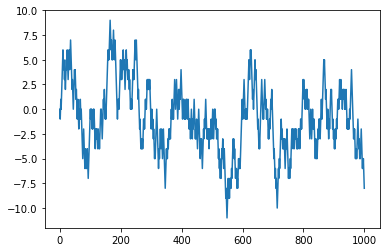

In [107]:
# 1,000步的随机漫步：
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

# 对随机漫步进行可视化
plt.plot(walk)
plt.show()

walk只是对随机步进的累积，并且可以通过一个数组表达式实现。因此，使用np.random模块一次性抽取1000次投掷硬币的结果，每次投掷的结果为1或-1，然后计算累积值：

In [108]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
# 从漫步轨道上提取一些统计数据，比如最大值、最小值等：
print(walk.min())
print(walk.max())

-9
60


更复杂的统计是第一次穿越时间，即随机漫步的某一步达到了某个特定值。这里假设我们想要知道漫步中是何时连续朝某个方向连续走了10步。np.abs（walk）>=10给我们一个布尔值数组，用于表明漫步是否连续在同一方向走了十步，但是我们想要的是第一次走了10步或-10步的位置。可以使用argmax来计算，该函数可以返回布尔值数组中最大值的第一个位置（True就是最大值）：

In [109]:
# 这是取位置下标
(np.abs(walk) >= 10).argmax()

297

> 这里使用argmax效率并不高，因为它总是完整地扫描整个数组。在这个特殊的示例中，一旦True被发现，就知道最大值了。

### 4.7.1　一次性模拟多次随机漫步
如果目标是模拟多次随机漫步，比如说5000步。可以稍微地修改下之前的代码来生成所有的随机步。如果传入一个2个元素的元组，numpy.random中的函数可以生成一个二维的抽取数组，并且可以一次性地跨行算出全部5000个随机步的累积和：

In [110]:
nwalks = 5000

nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0或1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

现在可以计算出这些随机步的最大值和最小值了：

In [111]:
walks.max(), walks.min()

(122, -128)

如果在这些随机步中计算出30或-30的最小穿越时间。由于不是所有的5000个都达到了30。可以用any方法来检查：

In [112]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
print(hits30, hits30.shape)
# True = 1, False = 0
hits30.sum() # 达到30或-30的数字

[ True  True  True ...  True False  True] (5000,)


3368

可以使用布尔值数组来选出绝对步数超过30的步所在的行，并使用argmax从轴向1上获取穿越时间：

In [113]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
print(crossing_times)
crossing_times.mean()

[133 395 343 ... 409 297 747]


509.99762470308787

利用其他分布而不是等概率的掷硬币实验来随机漫步也是很容易的。只需要使用一个不同的随机数生成函数，比如normal，再根据特定的均值和标准差即可生成正态分布下的随机步：

In [114]:
draws = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
print(walks, walks.shape)
print(walks.max(), walks.min())

[[ -1  -2  -3 ...   4   5   6]
 [ -1   0   1 ...  40  41  40]
 [  1   2   1 ...  32  31  30]
 ...
 [  1   0   1 ...  52  53  54]
 [ -1   0  -1 ... -12 -11 -10]
 [ -1   0   1 ...  -4  -5  -4]] (5000, 1000)
125 -126


In [115]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
print(hits30, hits30.shape)
# True = 1, False = 0
print(hits30.sum()) # 达到30或-30的数字

crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
print(crossing_times, crossing_times.shape)
print(crossing_times.mean())

[ True  True  True ...  True False  True] (5000,)
3389
[515 789 133 ... 113 175 611] (3389,)
503.91295367365007
